<a href="https://colab.research.google.com/github/k-tharshini/CODSOFT/blob/main/Data_science_task_2(Movie%20Rating%20prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install required libraries and packages and load the dataset from kaggle**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('IMDB-Movie-Data.csv')
df = pd.read_csv("IMDB-Movie-Data.csv")
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nSample rows:\n", df.head(5))

Shape of dataset: (1000, 12)

Columns:
 Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Sample rows:
    Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourd

**Check Missing values**

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


**Fill missing numerical features with median**

In [33]:
for col in ['Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore']:
    df[col] = df[col].fillna(df[col].median())
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
Genre_List            0
dtype: int64


**IMDb Rating Distribution**

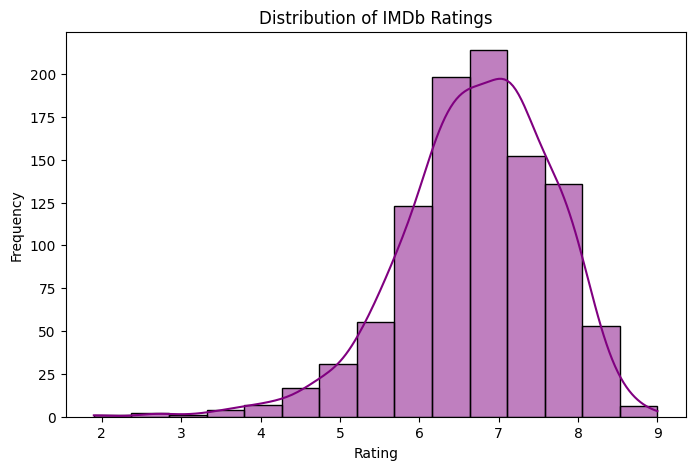

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'].dropna(), bins=15, kde=True, color='purple')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Drop the target rows**

In [ ]:

df = df.dropna(subset=['Rating'])

**Process Genre and generate a list of genre**

In [32]:
df['Genre_List'] = df['Genre'].apply(lambda x: [i.strip() for i in x.split(',')])
df['Genre_List'].head(5)

,Genre_List
0,"[Action, Adventure, Sci-Fi]"
1,"[Adventure, Mystery, Sci-Fi]"
2,"[Horror, Thriller]"
3,"[Animation, Comedy, Family]"
4,"[Action, Adventure, Fantasy]"


**Multi-hot encoding to encode genre list.**

In [ ]:
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df['Genre_List']), columns=mlb.classes_)
print(genre_encoded.head(5))

   Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
0       1          1          0          0       0      0      0       0   
1       0          1          0          0       0      0      0       0   
2       0          0          0          0       0      0      0       0   
3       0          0          1          0       1      0      0       1   
4       1          1          0          0       0      0      0       0   

   Fantasy  History  Horror  Music  Musical  Mystery  Romance  Sci-Fi  Sport  \
0        0        0       0      0        0        0        0       1      0   
1        0        0       0      0        0        1        0       1      0   
2        0        0       1      0        0        0        0       0      0   
3        0        0       0      0        0        0        0       0      0   
4        1        0       0      0        0        0        0       0      0   

   Thriller  War  Western  
0         0    0        0  
1     

**Encode Director**

In [ ]:
le_director = LabelEncoder()
df['Director_Encoded'] = le_director.fit_transform(df['Director'])

**Process Actors**

In [ ]:
df['Actors_Count'] = df['Actors'].apply(lambda x: len(x.split(',')))

**Combine features**

In [ ]:
X = pd.concat([
    df[['Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore', 'Director_Encoded', 'Actors_Count']],
    genre_encoded
], axis=1)
y = df['Rating']

**Split the Train-test data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create pipeline: random forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Predict and evaluate**

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

Mean Squared Error: 0.386


**Analysis the actual and predicted value**

In [ ]:

pred_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nSample Predictions:\n", pred_df.head())


Sample Predictions:
      Actual  Predicted
521     5.3      6.612
737     7.1      7.120
740     5.4      5.958
660     7.0      6.944
411     6.5      6.595


**Plot: Predicted vs Actual Ratings**

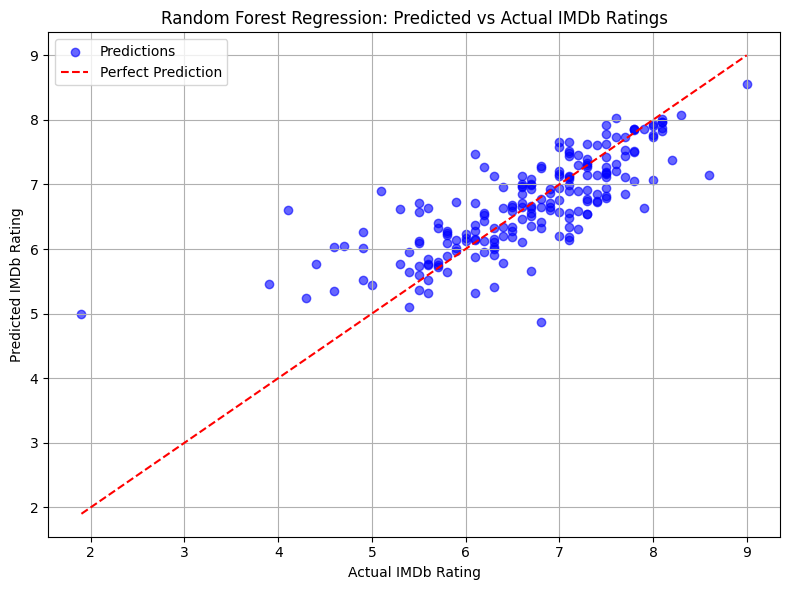

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual IMDb Rating')
plt.ylabel('Predicted IMDb Rating')
plt.title('Random Forest Regression: Predicted vs Actual IMDb Ratings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Get input from user and predict the rating of movie**

In [31]:

print("\n=== Enter Movie Details to Predict Rating ===")

try:
    # Numeric features
    runtime = float(input("Runtime (Minutes): "))
    votes = float(input("Votes: "))
    revenue = float(input("Revenue (Millions): "))
    metascore = float(input("Metascore: "))

    # Director
    director_input = input("Director Name: ").strip()
    if director_input in le_director.classes_:
        director_encoded = le_director.transform([director_input])[0]
    else:
        print("[Warning] Director not in training set. Using default encoding.")
        director_encoded = -1

    # Actors
    actors_input = input("Actors (comma-separated): ").strip()
    actors_count = len(actors_input.split(','))

    # Genre
    print(f"Available Genres: {list(mlb.classes_)}")
    user_genre_input = input("Enter genres (comma-separated): ").split(',')
    user_genre_input = [g.strip() for g in user_genre_input]

    # Multi-hot encoding for genres
    user_genre_vector = [1 if genre in user_genre_input else 0 for genre in mlb.classes_]

    # Combine all inputs into single sample
    user_features = np.array([
        runtime,
        votes,
        revenue,
        metascore,
        director_encoded,
        actors_count,
        *user_genre_vector
    ]).reshape(1, -1)

    # Predict
    predicted_rating = model.predict(user_features)[0]
    print(f"\n Predicted Movie Rating: {predicted_rating:.2f}/10")

except ValueError as e:
    print("\nInvalid input! Please enter the correct data types.")


=== Enter Movie Details to Predict Rating ===
Runtime (Minutes): 55
Votes: 10
Revenue (Millions): 43008600
Metascore: 3.9
Director Name: Will Smith, Jared Leto
[Warning] Director not in training set. Using default encoding.
Actors (comma-separated): Will Smith, Jared Leto
Available Genres: ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']
Enter genres (comma-separated): Animation,Comedy,Family

 Predicted Movie Rating: 5.02/10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
